# Linear Regression & Gradient Descent

We will review basic Python packages for data processing and machine learning.
An extremely useful resource are DataCamp's [cheat sheets](https://www.datacamp.com/cheat-sheet/category/python).

## Data 

The data are student marks in two term tests and a final exam, and we will use regression to create a model that predicts the final exam marks based on the two term test marks. Let's load the tabular data from a .cvs file and plot them:

In [1]:
import pandas as pd               # pandas package for data I/O and data frames 

marks = pd.read_csv("marks.csv")  # load data into dataframe marks
print( marks.columns )            # Column names
print( marks.shape )              # dataframe dimensions    
print(marks[5:10])                # print sample values    

marks.dropna(inplace = True )     # remove missing values (NaNs) 
print(marks[5:10])                   

Index(['TT1', 'TT2', 'FL'], dtype='object')
(277, 3)
    TT1   TT2    FL
5  95.0  70.0  60.0
6  38.0  47.0  36.0
7  41.0   NaN  33.0
8  58.0  46.0  41.0
9  88.0  81.0  81.0
     TT1   TT2    FL
5   95.0  70.0  60.0
6   38.0  47.0  36.0
8   58.0  46.0  41.0
9   88.0  81.0  81.0
10  31.0  76.0  33.0


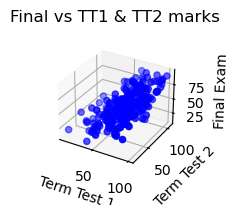

In [2]:
import matplotlib.pyplot as plt ; from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D projection 

fig = plt.figure(figsize=(15, 2)); ax = fig.add_subplot(projection='3d')

ax.scatter(marks["TT1"], marks["TT2"], marks["FL"], color='blue') 
ax.set_xlabel("Term Test 1")
ax.set_ylabel("Term Test 2")
ax.set_zlabel("Final Exam", rotation = 90)
ax.set_box_aspect(None, zoom=0.85)
ax.set_title("Final vs TT1 & TT2 marks")
plt.show()

## Fitting a Regression Model
We will now fit a mulitple linear regression using SciKit-Learn, the most popular machine learning library for Python.

In [3]:
import numpy as np

# Split data into response (y) and predictor (X) variables
y = np.array( marks[["FL"]] )         
X = np.array( marks[["TT1","TT2"]] )

# Fit linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()             # initialize a linear regression model
model.fit(X, y)                        # fit the model (OLS)

# Print model coefficients and intercept
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Evaluate the model (example using R-squared)
from sklearn.metrics import r2_score
y_pred = model.predict(X)             # Make in-sample predictions
print("R-squared:", r2_score(y, y_pred))


Intercept: [0.28512131]
Coefficients: [[0.31671956 0.58624752]]
R-squared: 0.6183515941745693


We can visualize the regression plane on a 3D scatterplot:

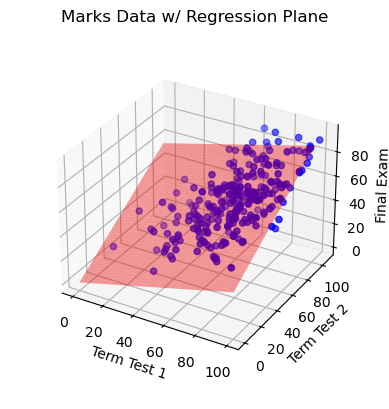

In [4]:
# Create a grid for the regression plane
x_grid, y_grid = np.meshgrid(np.linspace(0, 100, 100), np.linspace(0, 100, 100))
z_grid = model.predict(np.column_stack((x_grid.ravel(), y_grid.ravel()))).reshape(x_grid.shape)

# Create 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot( projection='3d') 
ax.scatter(marks["TT1"], marks["TT2"], marks["FL"], color='blue') 

# Plot the regression plane
ax.plot_surface(x_grid, y_grid, z_grid, color='r', alpha=0.4, label='Regression Plane')

# Labels and title
ax.set_xlabel("Term Test 1")
ax.set_ylabel("Term Test 2")
ax.set_zlabel("Final Exam", rotation = 90)
ax.set_title('Marks Data w/ Regression Plane')
ax.set_box_aspect(None, zoom=0.85)
plt.show()

### Predict & RMSE
Calculate the predicted Final Exam marks, assuming you got 57/100 in TT1 and 68/100 in TT2.
Also calculate the standard error of the estimate for this predictoin, given by the Root Mean Square Error:
$$RMSE = \sqrt{ \frac{ \sum_{n=1}^N (y_i - \hat{y}_i )^2 }{ N-D } } = \sqrt{ \frac{ \| \mathbf{y} - \hat{\mathbf{y}} \|_2^2 }{ N-D } } $$
(where $D$ is the number of regressor coefficients in the model, including the intercept.

In [5]:
import numpy as np
# Predicted Final Exam marks
scores_Got = np.array([[57,68]])

predicted_FinalScore = model.predict(scores_Got)
print(predicted_FinalScore)

[[58.2029679]]


In [6]:
# RMSE 
## RMSE = Sqrt(MSE)

X_design = np.c_[np.ones(len(X)),X]

RSS = np.sum((y-y_pred)**2)  # y_pred = model.predict(X)
MSE = RSS/(len(y)-X_design.shape[1])
RMSE = MSE**0.5 # or np.sqrt(MSE)
print(RMSE)


11.206015332143211


## Replication 

Calculate the coefficients and intercept using the OLS formula:
$$\hat{\mathbf{y}} = \mathbf{X} (\mathbf{X}^\top \mathbf{X} )^{-1} \mathbf{X}^\top y$$
$$\hat{\mathbf{w}} = (\mathbf{X}^\top \mathbf{X} )^{-1} \mathbf{X}^\top y$$
(Note that you will have to expand the design matrix $X$ to include a column of 1's in order to find the intercept!)


In [7]:
### Your code here ###
X_design = np.c_[np.ones(X.shape[0]),X]

w_hat = np.linalg.inv((X_design.T @ X_design))@X_design.T@y

print(w_hat)


[[0.28512131]
 [0.31671956]
 [0.58624752]]


In [8]:
print(model.coef_)
print(model.intercept_)

[[0.31671956 0.58624752]]
[0.28512131]


Use the fitted coeficients to calculate the R-squared:
$$R^2 = 1 - \frac{ \| \mathbf{y} - \hat{\mathbf{y}} \|_2^2 }{ \| \mathbf{y} - \bar{\mathbf{y}} \|_2^2  } = \frac{ \| \hat{\mathbf{y}} -\bar{\mathbf{y}}\|_2^2 }{ \| \mathbf{y} - \bar{\mathbf{y}} \|_2^2  }$$


where $\hat{\mathbf{y}} = \mathbf{X}\hat{\mathbf{w}}$ and $\bar{\mathbf{y}}= \frac{1}{N}\sum_{i=1}^N{y_i}$.
$$SSR=\| \hat{\mathbf{y}} -\bar{\mathbf{y}}\|_2^2 $$
$$SSE=\| \mathbf{y} - \hat{\mathbf{y}} \|_2^2$$
$$SST=\| \mathbf{y} - \bar{\mathbf{y}} \|_2^2$$


In [9]:
# R-Square = 1- SSE/SST

SSE = np.linalg.norm(y-y_pred)**2  # y_pred = X_design @ w_hat
SST = np.linalg.norm(y-np.mean(y))**2
print("SSE:",SSE) # this will be a number
print("R-Square:",1-SSE/SST)

SSE: 31393.69490605718
R-Square: 0.6183515941745693


In [10]:
# R-Square = SSR/SST

SSE = sum((y - y_pred)**2)

SSR = sum((y_pred - np.mean(y))**2) # this will be np array,output looks like "array([50864.46319671])"
SST = sum ((y-np.mean(y))**2)
R_square = SSR/SST
print(R_square)

[0.61835159]


In [11]:
from sklearn.metrics import r2_score
y_pred = model.predict(X)             # Make in-sample predictions
print("R-squared:", r2_score(y, y_pred))

R-squared: 0.6183515941745693


## Gradient Descent 

We will now find the regression coefficients using optimization/ERM, with squared error loss. Even though the parameters that minimize the RSS/MSE can be calculated in closed form (OLS estimates), we will [Gradient Descent](https://en.wikipedia.org/wiki/Gradient_descent), a numerical optimization method which forms the the basis of training deep neural networks. The idea behind GD is to take iterative steps in the opposite direction of the gradient (or approximate gradient) of the function at the current point, because this is the direction of steepest descent.

For objective function $f(\mathbf{x})$ with gradient $\nabla f(\mathbf{x})$, gradient descent works by starting at a (typically random) point $\mathbf{x}_0$ and iteratively updating it as  follows:
$$ \mathbf{x}_{n+1} = \mathbf{x}_n - \gamma \nabla f(\mathbf{x}_n),\;\; n\ge 0 $$

The parameter $\gamma$ is the step-size or "learning rate" of the algorithm, and it can be fixed throughout or change at each iteration.

Below is a toy 1D example using the (convex) objective function $f(x)=x^2$. For this function, GD is guaranteed to converge to the minimizing argument $x^\star = \text{arg min}_x f(x)$.

Optimal x: 0.00014272476927059603
Function value at optimal x: 2.0370359763344873e-08


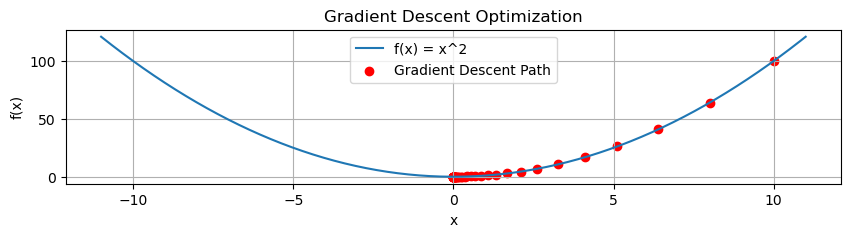

In [12]:
# Define the function to optimize
def f(x):
    return x**2

# Define the gradient of the function
def gradient(x):
    return 2*x

# Gradient Descent function
def gradient_descent(starting_point, learning_rate, num_iterations):
    x = starting_point
    history = [x]  # To store the history of x values for plotting
    for _ in range(num_iterations):
        x = x - learning_rate * gradient(x)  # Update x using the gradient
        history.append(x)
    return x, history

# Parameters
starting_point = 10  # Starting point for optimization
learning_rate = 0.1   # Learning rate
num_iterations = 50   # Number of iterations

# Perform gradient descent
optimal_x, history = gradient_descent(starting_point, learning_rate, num_iterations)

# Print the result
print(f"Optimal x: {optimal_x}")# {inside should be number}, o/w unhashable type error
print(f"Function value at optimal x: {f(optimal_x)}") 

# Plot the function and the optimization path
x_values = np.linspace(-11, 11, 400)
y_values = f(x_values)

plt.figure(figsize=(10, 2));plt.plot(x_values, y_values, label='f(x) = x^2')
plt.scatter(history, f(np.array(history)), color='red', label='Gradient Descent Path')
plt.title('Gradient Descent Optimization')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend();plt.grid();plt.show()


Write your own GD code for the regression model, using the RMSE as the objective function to minimize over the regression coefficients. Note that the gradient is:
$$ \nabla MSE( \mathbf{w} ) = \frac{d}{d \mathbf{w} } \| \mathbf{y} - \hat{\mathbf{y}} \|^2/N = \frac{d}{d \mathbf{w}} ( \mathbf{y} - \mathbf{X} \mathbf{w} )^{\top} ( \mathbf{y} - \mathbf{X}\mathbf{w} ) / N = - 2 \mathbf{X}^{\top} ( \mathbf{y} - \mathbf{X}\mathbf{w} ) / N$$
Run GD for $n=1000$ iterations with 0 initial values and a fixed step size of $\gamma=.0001$, and compare the coefficient estimates you get from GD with those from OLS.

In [13]:
### your code here 
N = len(X)
# Define the gradient of the function
def gradient(w):
    return -2*X_design.T@(y-X_design@w)/N 
           ## y and w(satrting point) have to be both 1D/2D array, i.e. having the shape (n,)(d,) or (n,1)(d,1)

# Gradient Descent function
def gradient_descent(starting_point, learning_rate, num_iterations):
    x = starting_point
    history = [x]  # To store the history of x values for plotting
    for _ in range(num_iterations):
        x = x - learning_rate * gradient(x)  # Update x using the gradient
        history.append(x)
    return x, history

# Parameters
starting_point = np.zeros(X_design.shape[1]).reshape(-1,1) # Starting point for optimization
   # np.random.normal(size=3).reshape(-1,1)  # or Random Starting point
learning_rate = 0.0001   # Learning rate
num_iterations = 1000   # Number of iterations

# Perform gradient descent
optimal_x, history = gradient_descent(starting_point, learning_rate, num_iterations)

# Print the result
print(f"Optimal x: {optimal_x}")


Optimal x: [[0.00873516]
 [0.31936421]
 [0.58760329]]


In [14]:
print(model.intercept_)
print(model.coef_)

[0.28512131]
[[0.31671956 0.58624752]]


In [15]:
# Prof Solution:

# Define the gradient of the function
def gradient( w, y, X_design ):
    return -2 * X_design.T @ ( y - X_design @ w ) / X_design.shape[0]

# Gradient Descent function
def gradient_descent(starting_point, learning_rate, num_iterations, y, X_design):
    w = starting_point
    for _ in range(num_iterations):
        w = w - learning_rate * gradient(w, y, X_design)  
    return w

# Parameters
starting_point = np.zeros(3).reshape(-1,1) # Starting point for optimization 
# np.random.normal(size=3).reshape(-1,1)  # or Random Starting point
learning_rate = 0.0001   # Learning rate
num_iterations = 1000  # Number of iterations


# Perform gradient descent
optimal_w = gradient_descent(starting_point, learning_rate, num_iterations, y, X_design)

print( optimal_w )


[[0.00873516]
 [0.31936421]
 [0.58760329]]
